# Final Project - Induction Motor Fault Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**4AI3 - Artificial Intelligence and Machine Learning** <br />
Dr. Hamidreza Mahyar <br />
Fall 2022

*Myko Smid:* 400192728 <br />
*Adam Sokacz:* 400177446



---



In [ ]:
#@title Import Libraries
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import glob
import time
import seaborn as sns
import sys
import matplotlib
#matplotlib.use('Agg')
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [ ]:
#@title Import preprocessed dataset from Google Drive
path = '/content/drive/MyDrive/4AI3/4AI3_Project/Colab/master200.csv' #@param {type:"string"}
df = pd.read_csv(path)
rand = 12 #@param {type:"slider", min:0, max:100, step:1}
df = shuffle(df, random_state = rand).reset_index().drop('index', axis = 1) 
df.head(5)

FileNotFoundError: ignored

# Plotting the imported dataset

Boxplot

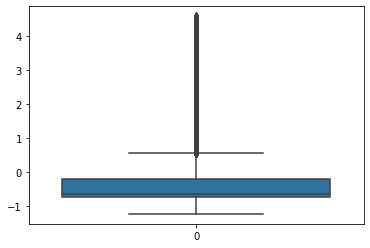

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
feature = "Tachometer Signal"#@param  ['Tachometer Signal', 'Underhang Accel. X', 'Underhang Accel. Y', 'Underhang Accel. Z', 'Overhang Accel. X', 'Overhang Accel. Y', 'Overhang Accel. Z', 'Microphone'] {type:"string"}
classification = 1 #@param  [0, 1] {type:"raw"}

sns.boxplot( data = (df.loc[df["Class"] == classification, feature]) );
plt.savefig(f'plots/{feature}_{classification}_Boxplot.png', dpi=400) 
plt.show()
plt.clf()

Histogram

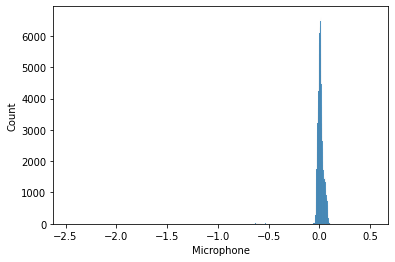

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
feature = "Microphone"#@param  ['Tachometer Signal', 'Underhang Accel. X', 'Underhang Accel. Y', 'Underhang Accel. Z', 'Overhang Accel. X', 'Overhang Accel. Y', 'Overhang Accel. Z', 'Microphone'] {type:"string"}
classification = 1 #@param  [0, 1] {type:"raw"}
sns.histplot( data = (df.loc[df["Class"] == classification, feature]) );
plt.savefig(f'plots/{feature}_{classification}_Histplot.png', dpi=400) 
plt.show()
plt.clf()

Scatterplot

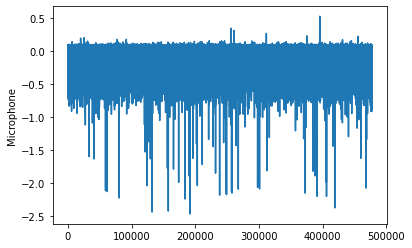

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
feature = "Microphone"#@param  ['Tachometer Signal', 'Underhang Accel. X', 'Underhang Accel. Y', 'Underhang Accel. Z', 'Overhang Accel. X', 'Overhang Accel. Y', 'Overhang Accel. Z', 'Microphone'] {type:"string"}
classification = 1 #@param  [0, 1] {type:"raw"}
sns.lineplot( data = (df.loc[df["Class"] == classification, feature]) );
plt.savefig(f'plots/{feature}_{classification}_Lineplot.png', dpi=400) 
plt.show()
plt.clf()

# Preparing dataframe

In [ ]:
#@title Checking for null values in dataset
print(f'Count of null values in dataset: {df.isnull().sum().sum()}')

Count of null values in dataset: 0


Normalizing dataframe

In [ ]:
y = df['Class']
X = df.drop(['Class'], axis = 1)
X.head()

ShowPlots = False #@param ["False", "True"] {type:"raw"}

print(f'BEFORE: Count by class {y.value_counts()}\n')

from imblearn.over_sampling import RandomOverSampler
overSampler = RandomOverSampler(sampling_strategy = 'not majority')
X_adj, y_adj = overSampler.fit_resample(X, y)
print(f'AFTER: Count by class {y_adj.value_counts()}')


if(ShowPlots):
  y.value_counts().plot.pie(autopct = '%.2f')
  plt.show()
  y_adj.value_counts().plot.pie(autopct = '%.2f')
  plt.show()

Train test split & scaling the dataframe

In [ ]:
shuffle = True #@param {type:"boolean"}
testSize = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X_adj, y_adj, shuffle = True, test_size = 0.2, random_state = 10)
print(f'xTrain: {xTrain.shape}\nyTrain: {yTrain.shape}\nxTest: {xTest.shape}\nyTest: {yTest.shape}\n')

sc = sklearn.preprocessing.StandardScaler()
xTrainSc = sc.fit_transform(xTrain)
xTestSc = sc.fit_transform(xTest)
print(f'Scaled: [ XTrain: {xTrainSc.shape}, XTest: {xTestSc.shape} ] \n')

xTrain: (666000, 8)
yTrain: (666000,)
xTest: (166500, 8)
yTest: (166500,)

Scaled: [ XTrain: (666000, 8), XTest: (166500, 8) ] 



# Models

In [ ]:
#@title SVM - 2 hour execution time, please enable GPU
from sklearn.svm import SVC
import time

svm = SVC(random_state = 1)
startTime = time.time()
svm.fit(xTrainSc, yTrain)
#print("SVM accuracy is {} on Train Dataset".format(svm.score(xTrainSc,yTrain)))
svmScore = svm.score(xTestSc,yTest)
print(f'SVM accuracy is {svmScore} on Test Dataset')
print(f'-\nTime Elapsed: {time.time() - startTime}\n SVM Accuracy Score: {svmScore}\n\n', file=open("ModelOutput.txt", "a") )

In [ ]:
#@title KNN - 40 second execution time
from sklearn.neighbors import KNeighborsClassifier
import time
knn = KNeighborsClassifier()
startTime = time.time()
knn.fit(xTrainSc, yTrain)
knnScore = knn.score(xTestSc, yTest)
print(f'KNN accuracy is {knnScore} on Test Dataset')
print(f'-\nTime Elapsed: {time.time() - startTime}\n KNN Accuracy Score: {knnScore}\n\n', file=open("ModelOutput.txt", "a") )

KNN accuracy is 0.9774534534534535 on Test Dataset


In [ ]:
#@title Feed Forward Neural Network - 50 second execution time per epoch
import time

activation = 'sigmoid' #@param ["sigmoid", "softmax", "tanh"] {type:"string"}
lossFunction = 'binary_crossentropy' #@param ["binary_crossentropy", "categorical_crossentropy, "sparse_categorical_crossentropy"] {type:"string"}
optimizers = 'adam' #@param ["adam", "SGD", "RMSprop", "Adadelta", "Adagrad"] {type:"string"}
numNodes = 128 #@param {type:"integer"}
numEpochs = 1 #@param {type:"integer"}

startTime = time.time()

model = keras.Sequential([
            keras.layers.Dense(numNodes, activation = 'relu', input_shape = [xTrainSc.shape[1]]),
            keras.layers.Dense(1, activation = 'sigmoid')
        ])
model.compile(
        optimizer = optimizers,
        loss = 'binary_crossentropy',
        metrics = 'accuracy'
    )
history = model.fit(xTrain, yTrain, verbose = 1, epochs = numEpochs, validation_split = 0.1)

model.evaluate(xTest, yTest)
myModelYPredict = [0 if x < 0.5 else 1 for x in model.predict(xTest)]
myModelAccuracy = sklearn.metrics.accuracy_score(yTest, myModelYPredict)
elapsedTime = round(time.time() - startTime, 2)
print(f'-\nTime Elapsed: {elapsedTime}\n [ u: { numNodes }, e: { numEpochs }, o: { optimizers } ] \n-> Accuracy: {myModelAccuracy} \n\n', 
                              file = open('ModelOutput.txt', 'a'))
        
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Loss Curve for model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Error', 'Valid Error'], loc='upper right')
plt.savefig(f'plots/{elapsedTime}_loss.png', dpi=400) 
plt.clf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model accuracy for model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'])
plt.savefig(f'plots/{elapsedTime}_Acc.png', dpi=400)
plt.clf()



5204/5204 [==============================] - 7s 1ms/step


<Figure size 432x288 with 0 Axes>